### Jasmine Dumas (1523905)
### CSC 478: Programming Machine Learning Applications - Autumn 2016
### [Assignment #3](http://facweb.cs.depaul.edu/mobasher/classes/csc478/Assignments/assign3.html)
### Due: Thursday, November 3, 2016

For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the Scikit-learn machine learning package for Python as well as modules from the textbook code (Machine Learning in Action, Chapters 8 and 10).

In [35]:
## load libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import pylab as pl
%matplotlib inline

1. **Linear Regression [Dataset: communities.zip]**

  * For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

  * Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .**

a. **Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn.** 
  * The provided data is already normalized (see description), so there is no need for additional normalization. 
  * Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [5]:
comms = pd.read_csv("communities/communities.csv")
comms.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [6]:
# how many columns and rows?
comms.shape

(1994, 100)

In [7]:
# what are the basic statistics for each of the variable?
comms.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [8]:
# handle missing data
np.sum(np.array(pd.isnull(comms)),0)  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
comms["OtherPerCap"].unique() # there is that ? used for a missing value

array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?', '0.39',
       '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1', '0.46',
       '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77', '0.69',
       '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59', '0.01',
       '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49', '0.56',
       '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79', '0.99',
       '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65', '0.89'], dtype=object)

In [10]:
comms.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap               object
HispPerCap               float64
NumUnderPov              float64
          

In [11]:
comms.OtherPerCap = pd.to_numeric(comms.OtherPerCap, errors='coerce') # coerce arg turns failures into NaN
comms.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap              float64
HispPerCap               float64
NumUnderPov              float64
          

In [12]:
comms = comms.dropna(axis=0)

In [13]:
# seperate the target attribute
y = np.array(comms.ViolentCrimesPerPop)
X = np.array(comms.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1))

In [14]:
# check that was successful
X.shape

(1993, 97)

In [15]:
y

array([ 0.2 ,  0.67,  0.43, ...,  0.23,  0.19,  0.48])

In [16]:
y.shape

(1993,)

b. **Perform standard linear regression on data using the implementation for Ch. 8 of MLA.** 
  * Compute the RMSE value on the full training data. 
  * Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). 
  * Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).


In [17]:
# Machine Learning in Action - Ch. 8, page 157

#we need to add a row of 1's to the X matrix since we want a constant in the model
x_var = np.array(X)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])

def standRegres(xArr, yArr):
    xMat = np.matrix(xArr) ; yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws



In [18]:
std_linear = standRegres(x_var, y)

In [19]:
std_linear

matrix([[  1.58394687e-01],
        [ -3.02481869e-02],
        [  2.12229063e-01],
        [ -3.97237986e-02],
        [ -1.27930326e-02],
        [  6.36900639e-02],
        [  1.22194419e-01],
        [ -2.23124229e-01],
        [ -1.42627637e-01],
        [  5.64658800e-02],
        [ -2.60230134e-01],
        [  4.65037847e-02],
        [ -2.00798143e-01],
        [ -2.08126761e-01],
        [  4.70792802e-02],
        [ -1.73534979e-01],
        [  5.82291674e-02],
        [  1.05064444e-02],
        [ -9.22106451e-02],
        [  2.72565616e-01],
        [  9.72713359e-02],
        [ -3.26302914e-01],
        [ -2.89431388e-02],
        [ -3.59461641e-02],
        [  2.28885702e-02],
        [  4.31169895e-02],
        [  3.76737976e-02],
        [  1.19950473e-01],
        [ -1.83693623e-01],
        [ -9.47657739e-02],
        [  5.55240764e-02],
        [  1.07281673e-01],
        [  3.24692051e-03],
        [  2.34646790e-01],
        [ -3.87649999e-02],
        [ -1.0317924

In [20]:
# RMSE
yHat = x_var*std_linear
yHatT = yHat.T
err = abs(yHatT - y)
total_error = np.dot(err,err.T)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print(rmse_train) 

[[ 0.12869119]]


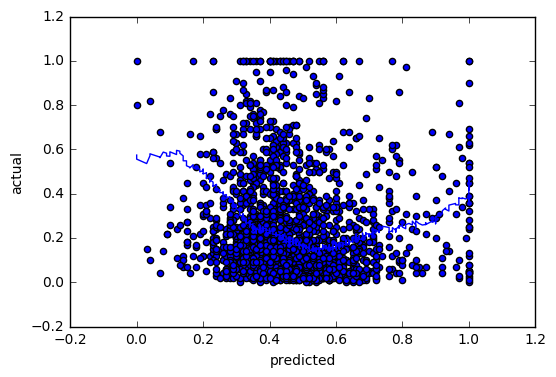

In [54]:
# Plot correlation between the predicted and actual values of the target attribute
# Get predicted values
xMat = np.matrix(x_var)
yMat = np.matrix(y)
yHat = xMat*std_linear

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(xMat[:,1].flatten(), yMat.T[:,0].flatten())
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])

xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*std_linear

ax.plot(xCopy[:,1], yHat)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show() 

In [27]:
# 10-fold cross-validation
X_array = np.array(x_var)
y_array = np.array(y)

In [28]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
from sklearn.metrics import zero_one_loss

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x_var,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
# Now let's compute RMSE using 10-fold cross-validation
kf = KFold(len(x_var), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x_var[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x_var[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x_var))

In [30]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1287
RMSE on 10-fold CV: 0.1363


The 10-fold cross validation RMSE was higher than the original, leading to a more precise model to try an overcome the differences in variance.

c. **Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. **
  * For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). 
  * Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [31]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

for train, test in KFold(n = len(X_array), n_folds=5, random_state = 99):
    X_train, y_train = X_array[train], y_array[train]
    X_test, y_test = X_array[test], y_array[test]

In [32]:
from sklearn.feature_selection import SelectPercentile, f_regression
# extract the features with the most predictive power (explains the most variance)
selector = SelectPercentile(f_regression, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [33]:
scores

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,
         0.,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

d. **Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model.**

* In each case, perform systematic model selection to identify the optimal alpha parameter. 
* First, create a 20%-80% randomized split of the data. 
* Set aside the test portion; the model selection process should be performed using the 80% training data partition. 
* You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. 
* The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). 
* You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. 
* Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [44]:
# 80 / 20 split for data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_var, y, test_size=0.2, random_state=33)
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test.shape)

X_train size:  (1594, 98)
X_test size:  (399, 98)
y_train size:  (1594,)
y_test size:  (399,)


In [45]:
ridge = Ridge(fit_intercept=True, alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
p=ridge.predict(x_var)
err=p-y
total_error=np.dot(err,err)
rmse_train=np.sqrt(total_error/len(p))

kf=KFold(len(x_var), n_folds=10)
xval_err=0
for train, test in kf:
    ridge.fit(x_var[train],y[train])
    p=ridge.predict(x_var[test])
    e=p-y[test]
    xval_err+=np.dot(e,e)
rmse_10cv=np.sqrt(xval_err/len(x_var))

print("Ridge Regression")
print('RMSE on training: ', rmse_train)
print('RMSE on 10-fold CV: ', rmse_10cv)

Ridge Regression
RMSE on training:  0.129880246459
RMSE on 10-fold CV:  0.135772917737


In [40]:
a=0.2
x=x_var

for name,met in[
        ('linear regression', LinearRegression()),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a)),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(x_var,y)
    p=met.predict(x_var)
    e=p-y
    total_error=np.dot(e,e)
    rmse_train=np.sqrt(total_error/len(p))
    
    kf=KFold(len(x_var), n_folds=10)
    err=0
    for train, test in kf:
        met.fit(x_var[train],y[train])
        p=met.predict(x_var[test])
        e=p-y[test]
        err+=np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x_var))
    print('Method: ', name)
    print('RMSE on training: ', rmse_train)
    print('RMSE on 10-fold CV: ', rmse_10cv)
    

Method:  linear regression
RMSE on training:  0.128691194406
RMSE on 10-fold CV:  0.136298055672
Method:  elastic-net
RMSE on training:  0.232984833141
RMSE on 10-fold CV:  0.233039434561
Method:  lasso
RMSE on training:  0.232984833141
RMSE on 10-fold CV:  0.233039434561
Method:  ridge
RMSE on training:  0.128937729639
RMSE on 10-fold CV:  0.135604701186


The optimal value for the alpha parameter was 0.2 and the best methods were the elastic net and lasso regression. Ridge regression, LASSO, and elastic net are part of the same family with penalty term, alpha. 

e. **Next, perform regression using Stochastic Gradient Descent for regression.** 

* For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). 
* Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). 
* Using the best parameters, apply the model to the set-aside test data. 
* Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x_var)
x_s=scaler.transform(x_var)

sgdreg=SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Calculate the RMSE for fitting a single model

sgdreg.fit(x_var,y)
p=sgdreg.predict(x_var)
err=p-y
total_error=np.dot(err,err)
rmse_train=np.sqrt(total_error/len(p))

# RMSE using 10-fold cross-validation

kf=KFold(len(x_var), n_folds=10)
xval_err = 0
for train, test in kf:
    scaler=StandardScaler()
    scaler.fit(x_var[train])
    xtrain_s = scaler.transform(x_var[train])
    xtest_s = scaler.transform(x_var[test])
    sgdreg.fit(xtrain_s, y[train])
    p=sgdreg.predict(xtest_s)
    e=p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv=np.sqrt(xval_err/len(x_var))

print("Stochastic Gradient Descent Regression")
print('RMSE on training: ', rmse_train)
print('RMSE on 10-fold CV: ', rmse_10cv)

Stochastic Gradient Descent Regression
RMSE on training:  0.146835654734
RMSE on 10-fold CV:  0.137287003926


____

 2. **Automatic Document Clustering [Dataset: newsgroups5.zip]**

For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]


a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

c. As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [Note: if you run into problems due to limited computational resources, you may prune the data by removing all terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to maintain the correspondence between the dictionary terms and the matrix rows.]

d. Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. Cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears. Sort the terms in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

e. Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

f. Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and each cluster centroids. Present your results in a separate file containing the obtained cluster label for each test document as well as Cosine similarities between each test document and each of the 5 clusters.

In [17]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from numpy import array
from numpy import *
import kNN
import kMeans
import helper

In [23]:
#data = pd.read_csv("newsgroups5/matrix.txt")
data = np.genfromtxt("newsgroups5/matrix.txt",delimiter=",",dtype=int)

In [7]:
data.shape

(9327, 2500)

In [27]:
prunedMat = helper.pruneMat(data)
prunedMatT = prunedMat.T
prunedMatT.shape
weighted = kNN.generateWeightedMatrix(prunedMatT)
print (weighted.shape)
print (weighted)
weightedMat = np.mat(weighted)
centroidsPruned, clustersPruned, ptsInClustersPruned = kMeans.kMeans(weightedMat, 5, helper.distCosine)

# --------------------- #



pruned shape is:  (3367, 2500)
prunedMat shape is:  (3367, 2500)
(2500, 3367)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


ValueError: shapes (3367,) and (1,3367) not aligned: 3367 (dim 0) != 1 (dim 0)

In [25]:
from sklearn.cross_validation import train_test_split
tpercent = 0.8
tsize=len(prunedMatT) * tpercent
tsize
pruned_train, pruned_test = train_test_split(prunedMatT, test_size=.20, random_state=42)
print (pruned_train.shape)
print (pruned_test.shape)

(2000, 3367)
(500, 3367)


In [26]:
centroidsPruned, clustersPruned, ptsInClustersPruned = kMeans.kMeans(pruned_train, 5, helper.distCosine)

ValueError: shapes (3367,) and (1,3367) not aligned: 3367 (dim 0) != 1 (dim 0)